There is two types of regularization
* Lasso
* Ridge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # para importar o dataset diabetes
from sklearn.model_selection import train_test_split

# para preparar os folds da validação cruzada
from sklearn.model_selection import KFold

# para executar a validação cruzada
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error  # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression  # algoritmo Regressão Linear
from sklearn.linear_model import Ridge  # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso  # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor  # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor  # algoritmo Árvore de Regressão
from sklearn.svm import SVR  # algoritmo SVM

In [2]:
diabetes = load_diabetes()
dataset = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
dataset["target"] = diabetes.target
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
PLOT CORRELATION MATRIX

In [3]:
X = dataset[diabetes.feature_names]
y = dataset["target"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Multiple models

In [24]:
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

LR: MSE 2897.68 (632.61) - RMSE 53.83
Ridge: MSE 3414.97 (539.89) - RMSE 58.44
Lasso: MSE 3719.22 (635.23) - RMSE 60.99
KNN: MSE 3503.99 (639.35) - RMSE 59.19
CART: MSE 6604.06 (1313.79) - RMSE 81.27
SVM: MSE 5178.49 (823.23) - RMSE 71.96


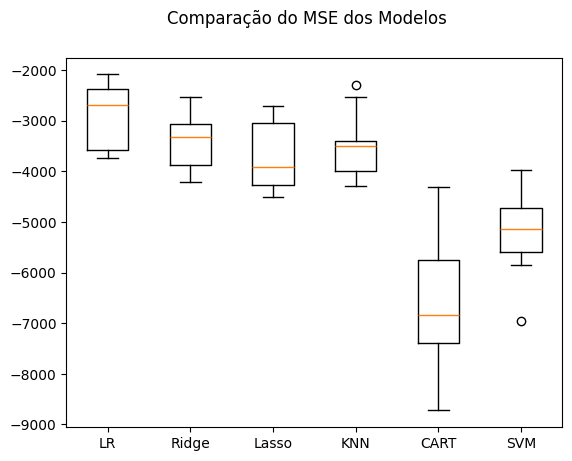

In [25]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(("LR", LinearRegression()))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("SVM", SVR()))

# Avaliando um modelo por vez
for name, model in models:
    cv_results = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error"
    )
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (
        name,
        abs(cv_results.mean()),
        cv_results.std(),
        np.sqrt(abs(cv_results.mean())),
    )
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle("Comparação do MSE dos Modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Linear Regression

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [6]:
predictions = linear_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, predictions)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {np.sqrt(abs(mse))}")

Linear Regression MSE: 3424.259334298692
Linear Regression RMSE: 58.51717127731562


# Ridge

In [12]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
predictions = ridge_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, predictions)
print(f"Ridge MSE: {mse}")
print(f"Ridge RMSE: {np.sqrt(abs(mse))}")

Ridge MSE: 3379.4063076042657
Ridge RMSE: 58.13266128093798


# Lasso

In [14]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
predictions = lasso_model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, predictions)
print(f"Lasso MSE: {mse}")
print(f"Lasso RMSE: {np.sqrt(abs(mse))}")

Lasso MSE: 3787.87429491264
Lasso RMSE: 61.545708988626004


# KNR (KNeighborsRegressor)

In [20]:
knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train, y_train)
predictions = knr_model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, predictions)
print(f"KNeighborsRegressor MSE: {mse}")
print(f"KNeighborsRegressor RMSE: {np.sqrt(abs(mse))}")

KNeighborsRegressor MSE: 4243.422022471909
KNeighborsRegressor RMSE: 65.14155373087065
